## Supreme Court Forecasting Project

we'll be using the dataset stevens.csv to build trees in R. Please download the dataset to follow along. This data comes from the [Supreme Court Forecasting Project](http://wusct.wustl.edu/data.php) website.

### CART in R

In [1]:
stevens = read.csv('./dataset/stevens.csv')

In [2]:
str(stevens)

'data.frame':	566 obs. of  9 variables:
 $ Docket    : Factor w/ 566 levels "00-1011","00-1045",..: 63 69 70 145 97 181 242 289 334 436 ...
 $ Term      : int  1994 1994 1994 1994 1995 1995 1996 1997 1997 1999 ...
 $ Circuit   : Factor w/ 13 levels "10th","11th",..: 4 11 7 3 9 11 13 11 12 2 ...
 $ Issue     : Factor w/ 11 levels "Attorneys","CivilRights",..: 5 5 5 5 9 5 5 5 5 3 ...
 $ Petitioner: Factor w/ 12 levels "AMERICAN.INDIAN",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Respondent: Factor w/ 12 levels "AMERICAN.INDIAN",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ LowerCourt: Factor w/ 2 levels "conser","liberal": 2 2 2 1 1 1 1 1 1 1 ...
 $ Unconst   : int  0 0 0 0 0 1 0 1 0 0 ...
 $ Reverse   : int  1 1 1 1 1 0 1 1 1 1 ...


In [3]:
library('caTools')

In [4]:
set.seed(3000)

In [5]:
spl = sample.split(stevens$Reverse, SplitRatio=0.7)

In [6]:
Train = subset(stevens, spl == TRUE)
Test = subset(stevens, spl == FALSE)

requires to install "rpart" packages
```R
install.package("rpart")
install.package("rpart.plot")
```

In [8]:
library("rpart")
library("rpart.plot")

In [9]:
StevensTree = rpart(Reverse ~ Circuit + Issue + Petitioner + 
                    Respondent + LowerCourt + Unconst, data=Train, method="class", minbucket=25)

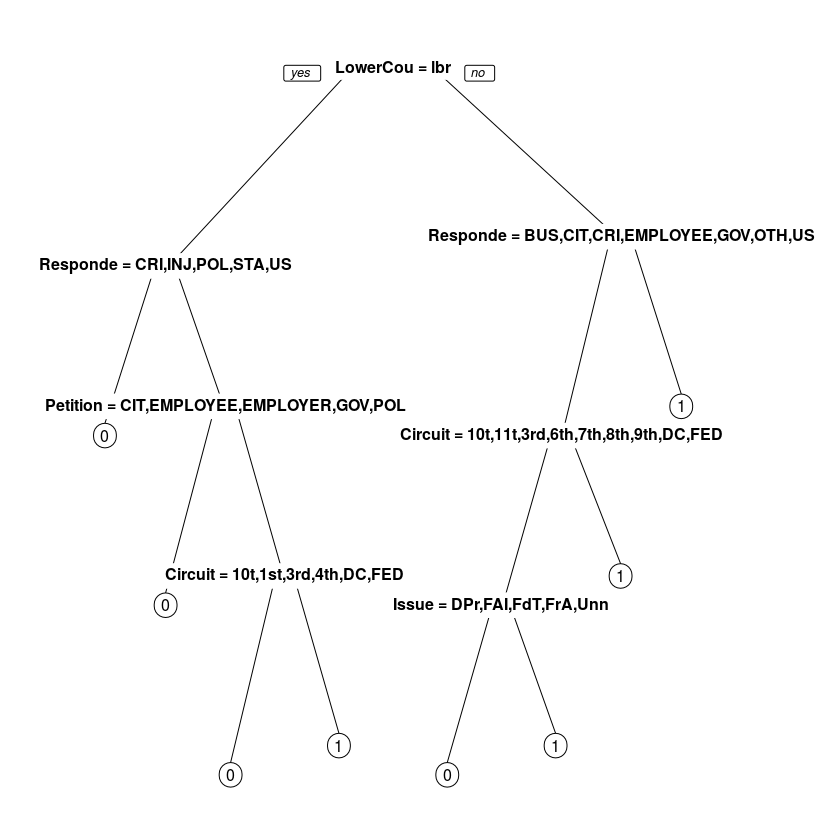

In [10]:
prp(StevensTree)

In [11]:
PredictCART = predict(StevensTree, newdata=Test, type='class')

In [12]:
table(Test$Reverse, PredictCART)

   PredictCART
     0  1
  0 41 36
  1 22 71

In [13]:
(41 + 71) / (41 + 36 + 22 + 71)

[1] 0.6588235

In [14]:
library("ROCR")

Loading required package: gplots


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




In [15]:
PredictROC = predict(StevensTree, newdata=Test)
PredictROC

,0,1
1,0.3035714,0.6964286
3,0.3035714,0.6964286
4,0.4000000,0.6000000
6,0.4000000,0.6000000
8,0.4000000,0.6000000
21,0.3035714,0.6964286
32,0.5517241,0.4482759
36,0.5517241,0.4482759
40,0.3035714,0.6964286
42,0.5517241,0.4482759


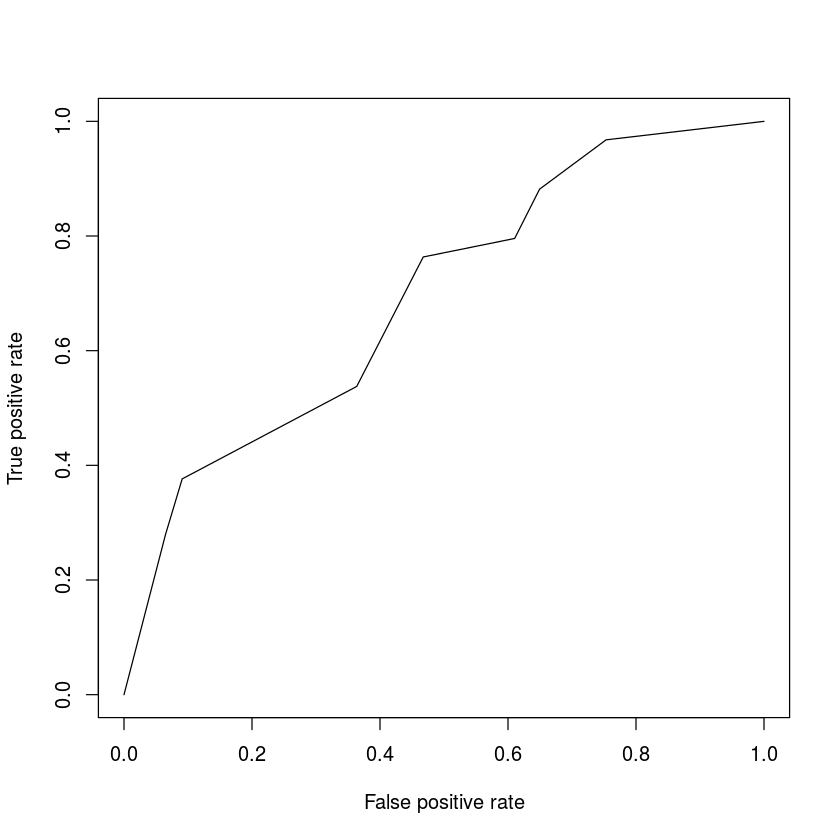

In [17]:
pred = prediction(PredictROC[,2], Test$Reverse)
perf = performance(pred, "tpr", "fpr")
plot(perf)

In [18]:
as.numeric(performance(pred, "auc")@y.values)

[1] 0.6927105

#### Quick Question

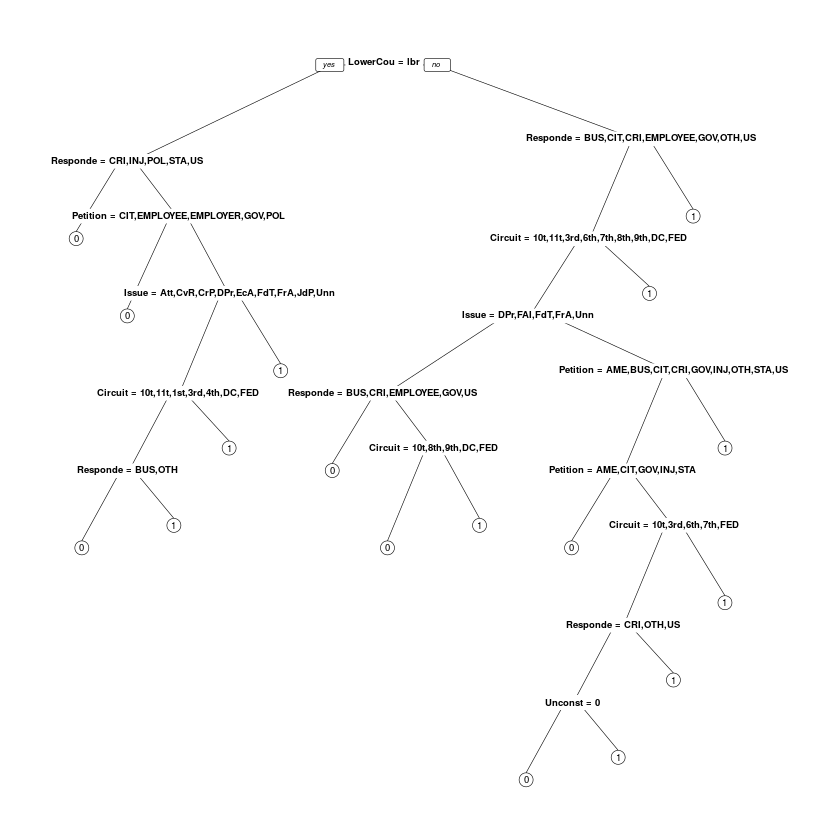

In [20]:
StevensTree2 = rpart(Reverse ~ Circuit + Issue + Petitioner + 
                    Respondent + LowerCourt + Unconst, data=Train, method="class", minbucket=5)
prp(StevensTree2)

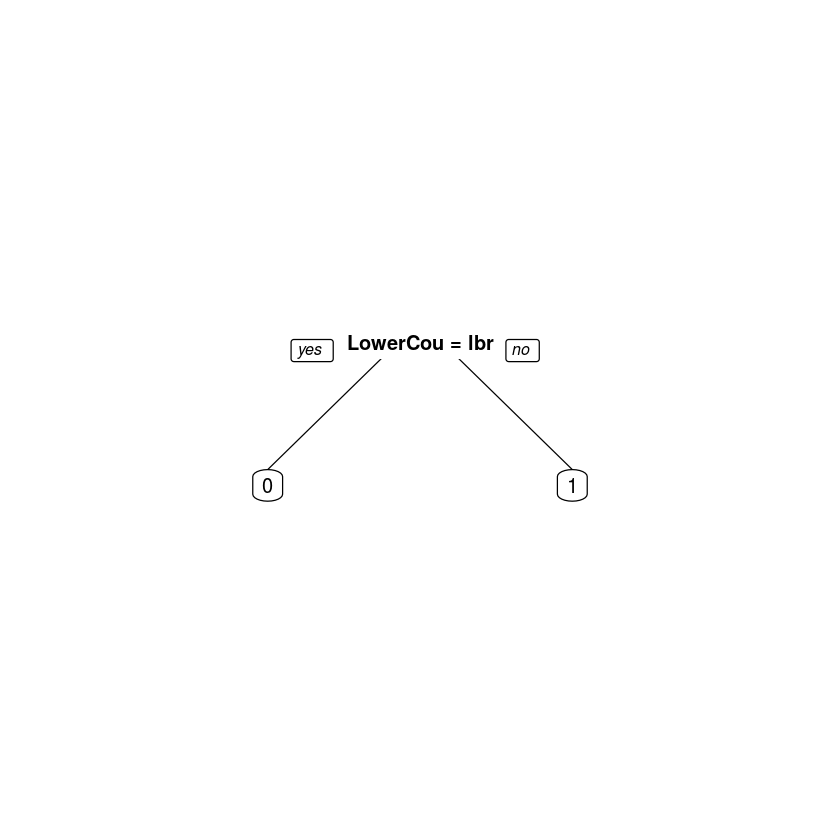

In [21]:
StevensTree3 = rpart(Reverse ~ Circuit + Issue + Petitioner + 
                    Respondent + LowerCourt + Unconst, data=Train, method="class", minbucket=100)
prp(StevensTree3)

### Random Forests

requires to install:
```R
install.packages("randomForest")
```

In [22]:
library('randomForest')

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [23]:
StevensForest = randomForest(Reverse ~ Circuit + Issue + Petitioner + Respondent + 
                             LowerCourt + Unconst, data=Train, nodesize=25, ntree=200)

Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”


Need to convert factor value

In [24]:
Train$Reverse = as.factor(Train$Reverse)
Test$Reverse = as.factor(Test$Reverse)

In [25]:
StevensForest = randomForest(Reverse ~ Circuit + Issue + Petitioner + Respondent + 
                             LowerCourt + Unconst, data=Train, nodesize=25, ntree=200)

In [26]:
PredictForest = predict(StevensForest, newdata=Test)

In [27]:
table(Test$Reverse, PredictForest)

   PredictForest
     0  1
  0 45 32
  1 22 71

In [28]:
accuracy = (45 + 71) / (45 + 32 + 22 + 71)
accuracy

[1] 0.6823529

#### Quick Question

In [29]:
set.seed(100)
StevensForest2 = randomForest(Reverse ~ Circuit + Issue + Petitioner + Respondent + 
                              LowerCourt + Unconst, data=Train, nodesize=25, ntree=200)
PredictForest2 = predict(StevensForest2, newdata=Test)
table(Test$Reverse, PredictForest2)

   PredictForest2
     0  1
  0 46 31
  1 19 74

In [30]:
accuracy = (46 + 74) / (46 + 31 + 19 + 74)
accuracy

[1] 0.7058824

In [31]:
set.seed(200)
StevensForest2 = randomForest(Reverse ~ Circuit + Issue + Petitioner + Respondent + 
                              LowerCourt + Unconst, data=Train, nodesize=25, ntree=200)
PredictForest2 = predict(StevensForest2, newdata=Test)
table(Test$Reverse, PredictForest2)

   PredictForest2
     0  1
  0 43 34
  1 18 75

In [32]:
accuracy = (43 + 75) / (43 + 34 + 18 + 75)
accuracy

[1] 0.6941176

### Cross Validation

Requires to install packages:
```R
install.packages("caret")
install.packages("e1071")
```
Additionally, install these packages:
```R
install.packages("class")
install.packages("ggplot2")
```
 If you receive an error message after trying to load caret and e1071, please try installing and loading these two additional packages.

In [33]:
library("caret")
library("e1071")

Loading required package: lattice

Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin




In [34]:
numFolds = trainControl(method="cv", number=10)

In [35]:
cpGrid = expand.grid(.cp=seq(0.01, 0.5, 0.01))

In [37]:
train(Reverse ~ Circuit + Issue + Petitioner + Respondent + 
      LowerCourt + Unconst, data=Train, method="rpart", trControl=numFolds,
     tuneGrid=cpGrid)

CART 

396 samples
  6 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 356, 356, 357, 356, 356, 357, ... 
Resampling results across tuning parameters:

  cp    Accuracy   Kappa      
  0.01  0.6241026  0.224147842
  0.02  0.6242308  0.227799127
  0.03  0.6266667  0.236482490
  0.04  0.6341667  0.259365609
  0.05  0.6442949  0.283778586
  0.06  0.6442949  0.283778586
  0.07  0.6442949  0.283778586
  0.08  0.6442949  0.283778586
  0.09  0.6442949  0.283778586
  0.10  0.6442949  0.283778586
  0.11  0.6442949  0.283778586
  0.12  0.6442949  0.283778586
  0.13  0.6442949  0.283778586
  0.14  0.6442949  0.283778586
  0.15  0.6442949  0.283778586
  0.16  0.6442949  0.283778586
  0.17  0.6442949  0.283778586
  0.18  0.6442949  0.283778586
  0.19  0.6212179  0.230766538
  0.20  0.6032692  0.188196256
  0.21  0.5882692  0.147602197
  0.22  0.5680128  0.087451763
  0.23  0.5428846  0.002564103
  0.24  0.5428846  0.002564103
  0.2

In [38]:
StevensTreeCV = rpart(Reverse ~ Circuit + Issue + Petitioner +
                      Respondent + LowerCourt + Unconst, data=Train, method='class', cp=0.18)

In [39]:
PredictCV = predict(StevensTreeCV, newdata=Test, type='class')

In [40]:
table(Test$Reverse, PredictCV)

   PredictCV
     0  1
  0 59 18
  1 29 64

In [41]:
accuracy = (59 + 64) / (59 + 18 + 29 + 64)
accuracy

[1] 0.7235294

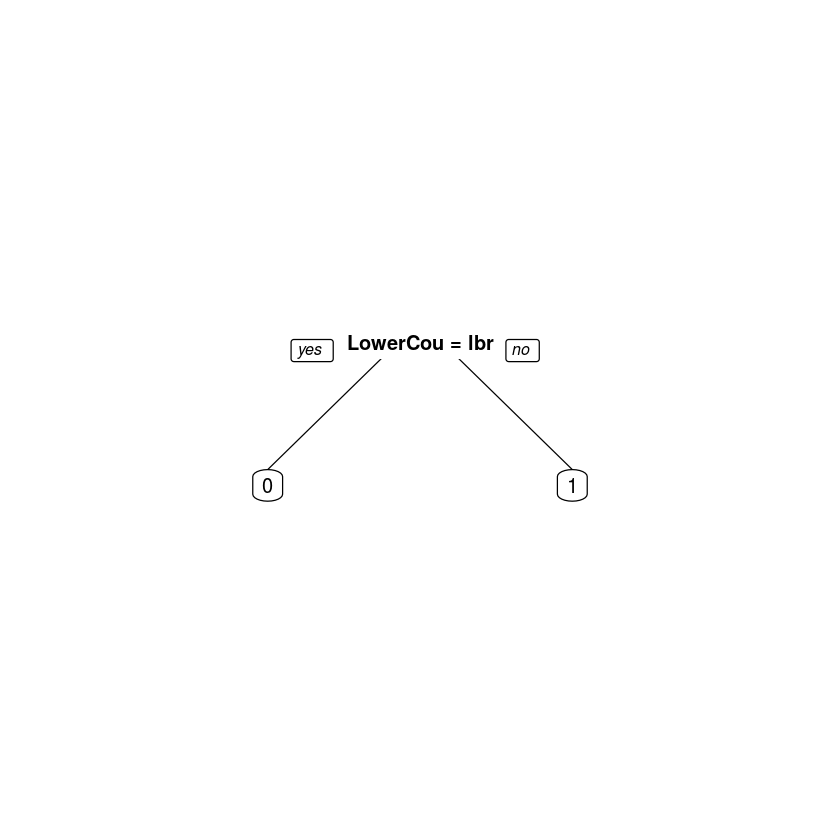

In [42]:
prp(StevensTreeCV)